**Práctica 02**
**Vargas Bravo Paola**

---


Procesamiento digital de Imágenes (2024-1)

In [ ]:
from PIL import Image,ImageDraw
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math

In [ ]:
def show_image(image) :
  arr = np.asarray(image)
  plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
  plt.show()

# **Ejercicio 1 y 2**


---




In [ ]:
def resolucion_espacial_redex(image, resolucion):
    resoluciones_Disponibles = [512,256,128,64,32,16,8,4,2]
    try :
      if (image.endswith(".jpg") or image.endswith(".png")) and os.path.exists(image):
       image_Abierta = Image.open(image)
       ancho, alto = image_Abierta.size
       if ancho == 1024 and alto == 1024 and (resolucion in resoluciones_Disponibles) and image_Abierta.mode == "L" :
        factor_reduccion = 1024 // resolucion
        imageN = Image.new('L', (resolucion, resolucion))

        for x in range(resolucion):
            for y in range(resolucion):
                x_original = x * factor_reduccion
                y_original = y * factor_reduccion
                pixel_value = image_Abierta.getpixel((x_original, y_original))
                imageN.putpixel((x, y), pixel_value)

        return imageN
       else :
          print("Se solicita una imagen de 1024 x 1024 en escala de grises")
          print("Con resoluciones validas de 512x512, 256x256, 128x128 y 64x64")
      else:
        raise ValueError("La imagen no tiene la extensión .jpg|.png o no existe el archivo")
    except ValueError as e:
          print(f"Error: {e}")


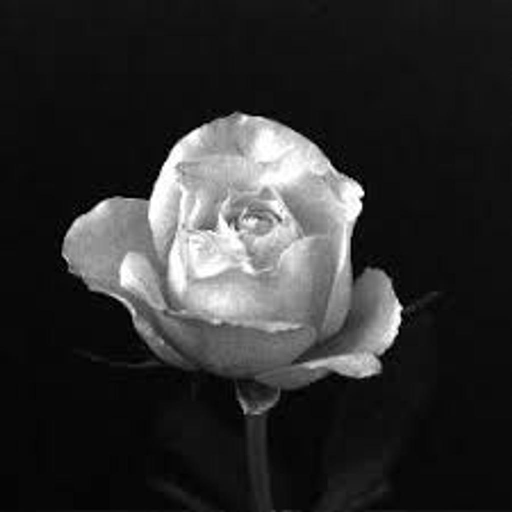

In [ ]:
resolucion_espacial_redex('rosa1024.jpg',512)

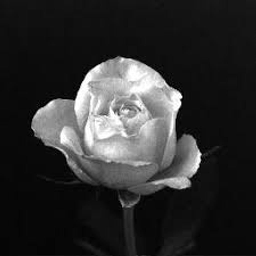

In [ ]:
resolucion_espacial_redex('rosa1024.jpg',256)


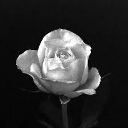

In [ ]:
resolucion_espacial_redex('rosa1024.jpg',128)

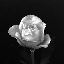

In [ ]:
resolucion_espacial_redex('rosa1024.jpg',64)

In [ ]:
resolucion_espacial_redex('rosa1024.jpg',2)

# **Ejercicio 3**


---



In [ ]:
def zoom(imagen) :
 try :
  if isinstance(imagen, Image.Image) and imagen.mode == 'L':
  #isinstance(imagen, Image.Image):
   imagen_zoom = Image.new('L', (1024, 1024))
   factor_aumento = 1024 / imagen.height
   for x in range(1024):
    for y in range(1024):
        original_x = x // factor_aumento
        original_y = y // factor_aumento
        pixel = imagen.getpixel((original_x, original_y))
        imagen_zoom.putpixel((x, y), pixel)
   return imagen_zoom
  else:
        raise ValueError("La imagen no es un objeto de PIL")
 except ValueError as e:
          print(f"Error: {e}")

In [ ]:
im = zoom(resolucion_espacial_redex('rosa1024.jpg',512))

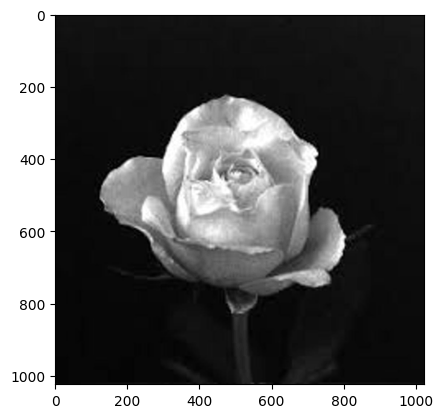

In [ ]:
show_image(im)

In [ ]:
im1 = zoom(resolucion_espacial_redex('rosa1024.jpg',256))

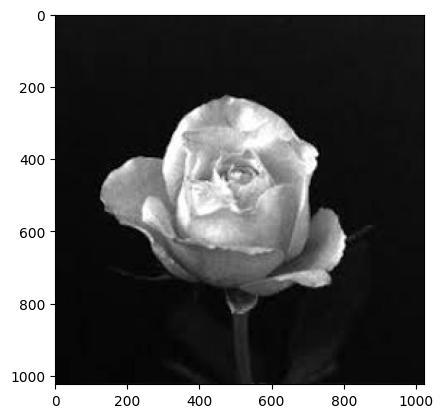

In [ ]:
show_image(im1)

In [ ]:
im2 = zoom(resolucion_espacial_redex('rosa1024.jpg',128))

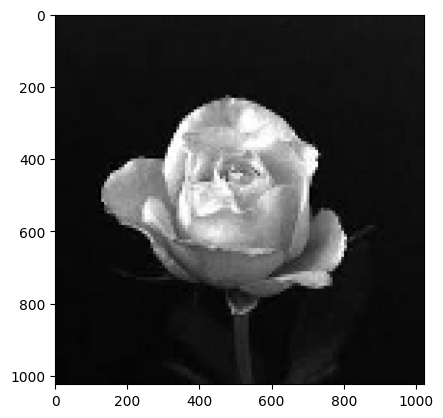

In [ ]:
show_image(im2)

In [ ]:
im3 = zoom(resolucion_espacial_redex('rosa1024.jpg',64))

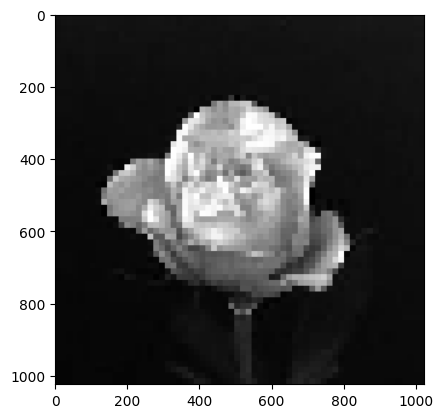

In [ ]:
show_image(im3)

In [ ]:
im4 = zoom(resolucion_espacial_redex('rosa1024.jpg',32))

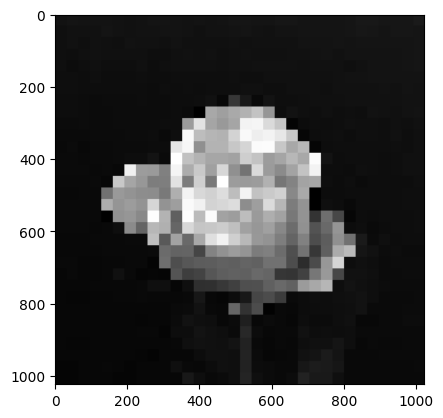

In [ ]:
show_image(im4)

## **Ejercicio 4 y 5**


---



In [ ]:
def cuantizacion_intensidad(image,nivel):
    niveles = [128,64,32,16,8,4,2]
    try :
      if (image.endswith(".jpg") or image.endswith(".png")) and os.path.exists(image) :
          image_Abierta = Image.open(image)
          if  image_Abierta.mode == "L" and (nivel in niveles):
            ancho, alto = image_Abierta.size
            imagen_nueva = Image.new("L", (ancho, alto))
            factor_reduccion = int( 255 / (nivel -1))
            #math.ceil(numero)
            for x in range(ancho):
                for y in range(alto):
                    pixel_valor = image_Abierta.getpixel((x, y))
                    escalar_gris = round(pixel_valor/255 *(nivel -1))
                    nuevo_valor_pixel = escalar_gris * factor_reduccion
                    imagen_nueva.putpixel((x, y), nuevo_valor_pixel)
                    #print(nuevo_valor_pixel)
            return imagen_nueva
          else :
           print("Se solicita que sea con escalas de grises en un rango de [0,255]")
           print("Con niveles validos 128,64,32,16,8,4,2")
      else:
        raise ValueError("La imagen no tiene la extensión .png|.jpg o no existe el archivo")
    except ValueError as e:
          print(f"Error: {e}")



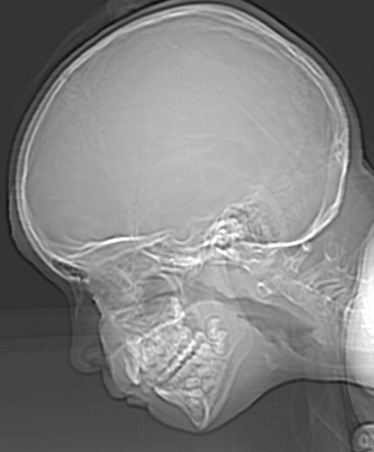

In [ ]:
cuantizacion_intensidad('X_raySkull.png',128)
#show_image(imG1)

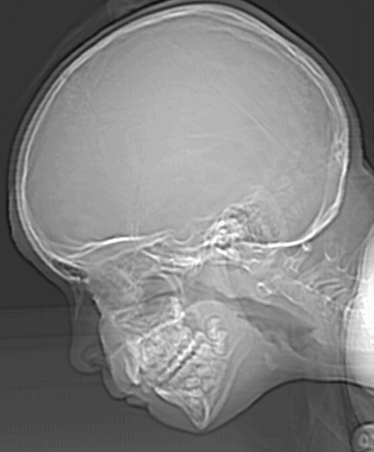

In [ ]:
cuantizacion_intensidad('X_raySkull.png',64)

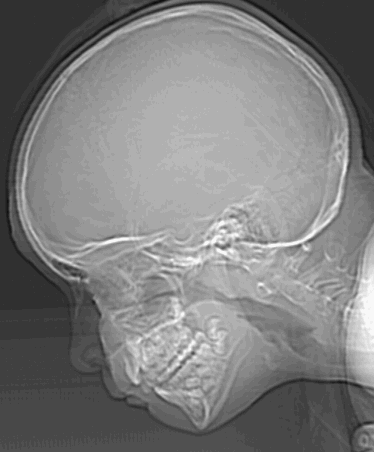

In [ ]:
cuantizacion_intensidad('X_raySkull.png',32)

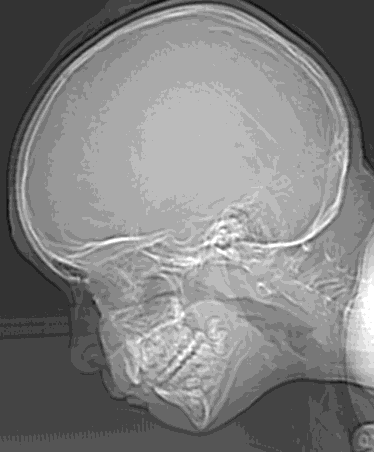

In [ ]:
cuantizacion_intensidad('X_raySkull.png',16)

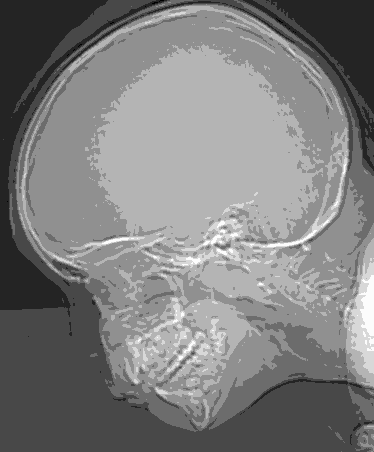

In [ ]:
cuantizacion_intensidad('X_raySkull.png',8)

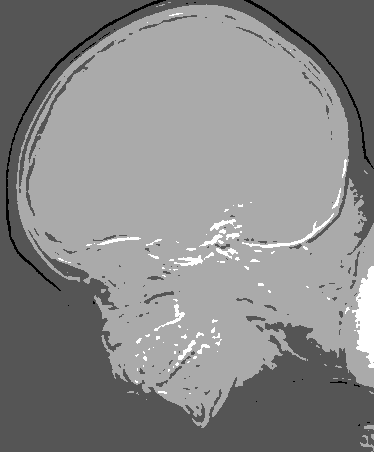

In [ ]:
cuantizacion_intensidad('X_raySkull.png',4)

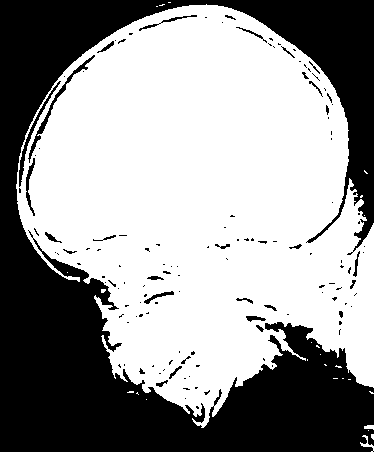

In [ ]:
cuantizacion_intensidad('X_raySkull.png',2)

## **Ejercicio 6**


---



In [ ]:
def adyacencias_pixels_random () :
    pixeles = [(random.randint(0, 53), random.randint(0, 47)) for _ in range(5)]
    #pixeles = [(0,0),(53,0),(0,47),(53,47),(5,25),(25,0),(0,25),(25,47),(53,25)]
    for pixel in pixeles :
     cuatro_adj = cuatro_adyacencias(pixel[0],pixel[1])
     ocho_adj = ocho_adyacencias(pixel[0],pixel[1])
     print('')
     print('')
     print(f'Pixel :({pixel[0]}, {pixel[1]})')
     print("Cuatro vecindad es :")
     for i in cuatro_adj :
      print(f'({i[0]}, {i[1]})', end=' ')
     print('')
     print("Ocho vecindad es :")
     for j in ocho_adj :
      print(f'({j[0]}, {j[1]})', end=' ')
    return pixeles

In [ ]:
def cuatro_adyacencias (x,y):
        pixeles_adj = []
        if x == 0 and y == 0 :
          pixeles_adj.append((x + 1, y))
          pixeles_adj.append((x, y + 1))
        elif x == 53 and y == 0 :
           pixeles_adj.append((x - 1, y))
           pixeles_adj.append((x, y + 1))
        elif x == 0 and y == 47 :
           pixeles_adj.append((x + 1, y))
           pixeles_adj.append((x, y - 1))
        elif x == 43 and y == 47:
           pixeles_adj.append((x, y - 1))
           pixeles_adj.append((x - 1, y))
        elif x > 0 and y == 0 :
            pixeles_adj.append((x - 1, y))
            pixeles_adj.append((x , y + 1))
            pixeles_adj.append((x + 1, y))
        elif x == 0 and y > 0 :
            pixeles_adj.append((x, y - 1))
            pixeles_adj.append((x , y + 1))
            pixeles_adj.append((x + 1, y))
        elif x == 53 and y > 0 :
            pixeles_adj.append((x - 1, y))
            pixeles_adj.append((x, y - 1))
            pixeles_adj.append((x, y + 1))
        elif x > 0 and y == 47 :
           pixeles_adj.append((x - 1, y))
           pixeles_adj.append((x + 1, y))
           pixeles_adj.append((x, y - 1))
        else :
           pixeles_adj.append((x - 1, y))
           pixeles_adj.append((x + 1, y))
           pixeles_adj.append((x, y - 1))
           pixeles_adj.append((x, y + 1))
        return pixeles_adj

In [ ]:
def ocho_adyacencias(x,y) :
        pixeles_adj = cuatro_adyacencias(x,y)
        if x == 0 and y == 0 :
          pixeles_adj.append((x + 1, y + 1))
        elif x == 53 and y == 0 :
           pixeles_adj.append((x - 1, y + 1))
        elif x == 0 and y == 47 :
           pixeles_adj.append((x + 1, y - 1))
        elif x == 53 and y == 47:
           pixeles_adj.append((x - 1, y - 1))
        elif x > 0 and y == 0 :
            pixeles_adj.append((x - 1, y + 1))
            pixeles_adj.append((x + 1, y + 1))
        elif x == 0 and y > 0 :
            pixeles_adj.append((x + 1, y - 1))
            pixeles_adj.append((x + 1, y + 1))
        elif x == 53 and y > 0 :
            pixeles_adj.append((x - 1, y - 1))
            pixeles_adj.append((x - 1, y + 1))
        elif x > 0 and y == 47 :
           pixeles_adj.append((x - 1, y- 1))
           pixeles_adj.append((x + 1, y - 1))
        else :
           pixeles_adj.append((x - 1, y-1))
           pixeles_adj.append((x + 1, y-1))
           pixeles_adj.append((x - 1, y + 1))
           pixeles_adj.append((x + 1 , y + 1))
        return pixeles_adj

In [ ]:
pixeles = adyacencias_pixels_random()



Pixel :(5, 41)
Cuatro vecindad es :
(4, 41) (6, 41) (5, 40) (5, 42) 
Ocho vecindad es :
(4, 41) (6, 41) (5, 40) (5, 42) (4, 40) (6, 40) (4, 42) (6, 42) 

Pixel :(25, 41)
Cuatro vecindad es :
(24, 41) (26, 41) (25, 40) (25, 42) 
Ocho vecindad es :
(24, 41) (26, 41) (25, 40) (25, 42) (24, 40) (26, 40) (24, 42) (26, 42) 

Pixel :(42, 32)
Cuatro vecindad es :
(41, 32) (43, 32) (42, 31) (42, 33) 
Ocho vecindad es :
(41, 32) (43, 32) (42, 31) (42, 33) (41, 31) (43, 31) (41, 33) (43, 33) 

Pixel :(1, 25)
Cuatro vecindad es :
(0, 25) (2, 25) (1, 24) (1, 26) 
Ocho vecindad es :
(0, 25) (2, 25) (1, 24) (1, 26) (0, 24) (2, 24) (0, 26) (2, 26) 

Pixel :(46, 46)
Cuatro vecindad es :
(45, 46) (47, 46) (46, 45) (46, 47) 
Ocho vecindad es :
(45, 46) (47, 46) (46, 45) (46, 47) (45, 45) (47, 45) (45, 47) (47, 47) 

## **Ejercicio 7**


---



In [ ]:
def marcar(image,adj) :
  dibujo = ImageDraw.Draw(image)
  i = 0
  for (px, py) in adj:
            dibujo.point((px, py), fill="blue")  # Marcar en azul
  return image

In [ ]:
def adyacencias_show(imagen) :
  try :
   if (imagen.endswith(".jpg") or imagen.endswith(".png")) and os.path.exists(imagen):
    image_Abierta = Image.open(imagen)
    ancho, alto = image_Abierta.size
    if ancho == 54 and alto == 48  and image_Abierta.mode == 'L':
     for pixel in pixeles :
      cuatro_ady = cuatro_adyacencias(pixel[0],pixel[1])
      image_ady = marcar(image_Abierta,cuatro_ady)
     show_image(image_ady)
     for pixel in pixeles :
      ocho_ady = ocho_adyacencias(pixel[0],pixel[1])
      image_ady2 = marcar(image_Abierta,ocho_ady)
     show_image(image_ady2)
    else :
          print("Se solicita una imagen de 54 x 48 en escala de grises")
   else:
      raise ValueError("La imagen no tiene la extensión .png|.png o no existe el archivo")
  except ValueError as e:
          print(f"Error: {e}")

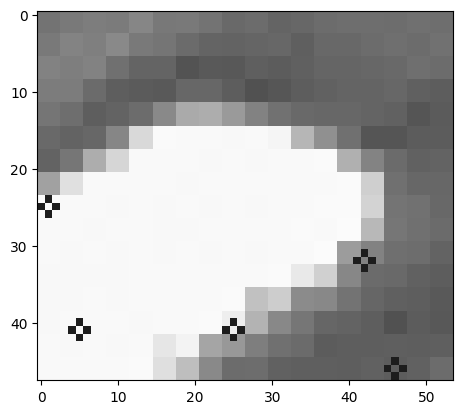

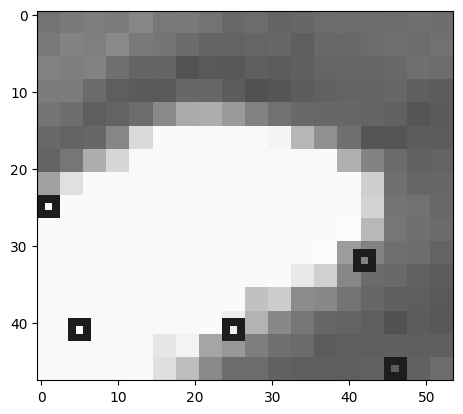

In [ ]:
adyacencias_show('cuadro.png')

## **Ejercicio 8**


---



In [ ]:
def cityBlock(punto1,punto2):
  print(f'({punto1[0]}, {punto1[1]}) a ({punto2[0]}, {punto2[1]}) = ')
  distancia = (punto1[0]-punto2[0]) + (punto1[1] - punto2[1])
  return abs(distancia)

In [ ]:
def chessBoard(punto1,punto2):
  print(f'({punto1[0]}, {punto1[1]}) a ({punto2[0]}, {punto2[1]}) =')
  pmax_1 = abs(punto1[0]-punto2[0])
  pmax_2 = abs(punto1[1] - punto2[1])
  return max(pmax_1,pmax_2)

In [ ]:
def distancias_4_8() :
  p1 = pixeles[0]
  #CityBlock
  print("CityBlock")
  for i in range(1,5) :
    distancia = cityBlock(p1,pixeles[i])
    print(distancia)
  #chessboard
  print("ChessBoard")
  for i in range(1,5) :
    distancia = chessBoard(p1,pixeles[i])
    print(distancia)


In [ ]:
def marcar2(image,pixeles) :
  dibujo = ImageDraw.Draw(image)
  i = 0
  for (px, py) in pixeles:
         if i == 0 :
            dibujo.point((px, py), fill="red")  # Marcar en azul
            i = i + 1
         else :
            dibujo.point((px, py), fill="blue")  # Marcar en azul
  return image

In [ ]:
def show_pixeles(imagen) :
  try :
      if (imagen.endswith(".jpg") or imagen.endswith(".png")) and os.path.exists(imagen):
        imagen_Abierta = Image.open(imagen)
        ancho, alto = imagen_Abierta.size
        if ancho == 54 and alto == 48 and imagen_Abierta.mode == 'L':
          image_ady2 = marcar2(imagen_Abierta,pixeles)
          show_image(image_ady2)
        else :
          print("Se solicita una imagen de 54 x 48")
      else:
        raise ValueError("La imagen no tiene la extensión .png|.png o no existe el archivo")
  except ValueError as e:
          print(f"Error: {e}")

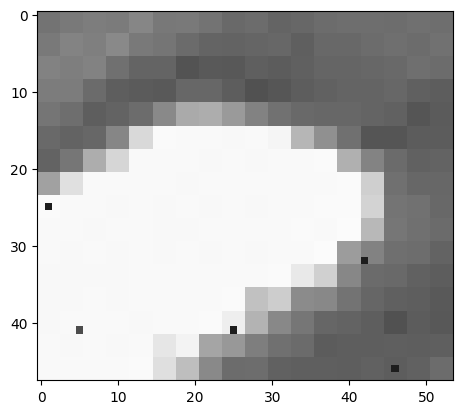

In [ ]:
show_pixeles('cuadro.png')

In [ ]:
distancias_4_8()

CityBlock
(5, 41) a (25, 41) = 
20
(5, 41) a (42, 32) = 
28
(5, 41) a (1, 25) = 
20
(5, 41) a (46, 46) = 
46
ChessBoard
(5, 41) a (25, 41) =
20
(5, 41) a (42, 32) =
37
(5, 41) a (1, 25) =
16
(5, 41) a (46, 46) =
41
